In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import trange, tqdm
tqdm.pandas()

In [47]:
metrics = pd.read_excel('../data/working_dir/metrics_comparison.xlsx', )
metrics.columns = pd.Series(metrics.columns).apply(lambda el: f"${el}$")
metrics

,$models$,$mean\_F_1$,$Accuracy$,$BertScore\_F_1$,$chrF++$,$Jaccard\_measure$
0,YaGPT Lite,0.432540,0.474747,0.674222,36.345512,0.157380
1,YaGPT Pro,0.654752,0.676768,0.758793,51.026090,0.320395
2,YaGPT Pro (finetuned),0.765099,0.777778,0.771409,47.824562,0.374862
3,Saiga Mistral,0.518173,0.525253,0.693550,35.487165,0.189184
4,Saiga Llama3-F16,0.667317,0.686869,0.719104,45.070653,0.267669
5,Saiga Llama3-Q8-0,0.667317,0.686869,0.729687,46.977054,0.280999
6,Saiga Llama3-Q4-K,0.491741,0.535354,0.729384,45.902858,0.286635
7,Saiga Llama3-Q2-K,0.319023,0.414141,0.569425,10.211421,0.032787


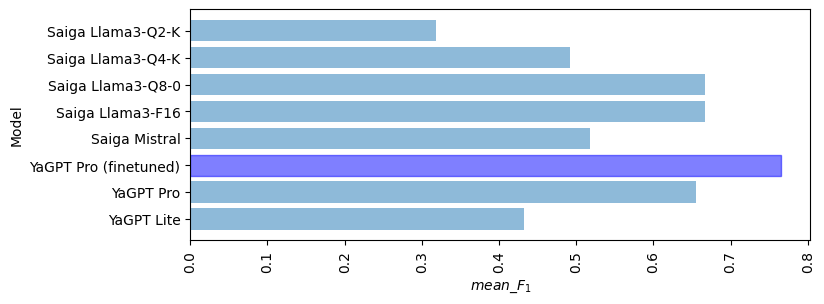

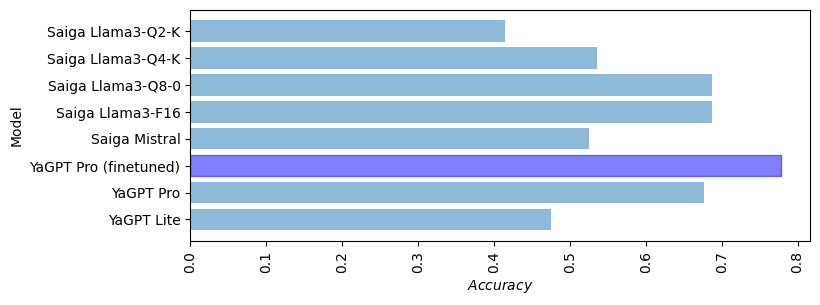

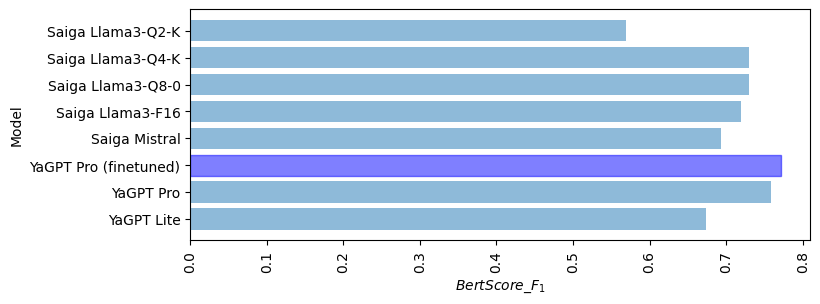

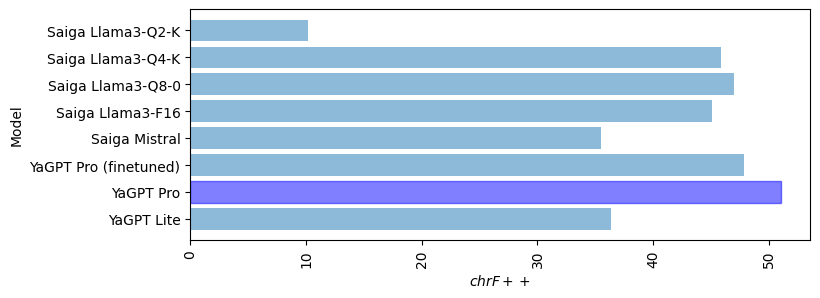

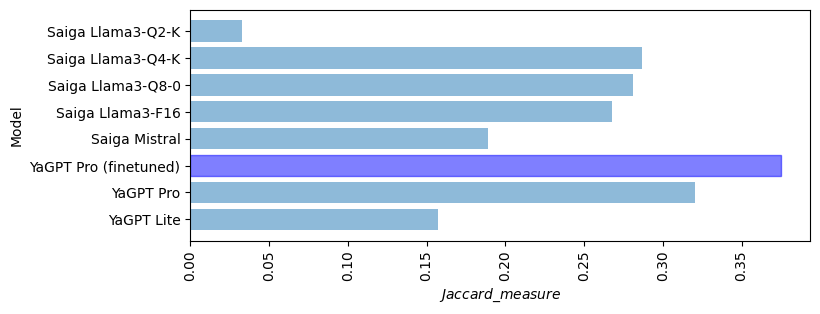

In [61]:
for metric in metrics.columns[1:]:
    plt.figure(figsize=(8, 3))
    ax = plt.barh(y=metrics['$models$'], width=metrics[metric], alpha=0.5)
    ax.patches[metrics[metric].argmax()].set_color('blue')
    
    plt.ylabel('Model')
    plt.xlabel(metric)
    plt.xticks(rotation=90, horizontalalignment='center')
    metric = metric[1:-1].replace('\\', '')
    plt.savefig(f'../data/models_metrics_{metric}.png', bbox_inches='tight', dpi=400)
    plt.show()


In [26]:
!wget https://huggingface.co/IlyaGusev/saiga_llama3_8b_gguf/resolve/main/model-q4_K.gguf


"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [9]:
markups = []

temperatures = list(np.arange(0, 1.01, 0.05).round(2))

markup_files = [f'../data/working_dir/gpt/metrics/markup_preprocessed_with_metrics_T-{t}.csv' for t in temperatures]

markup_names = [f'T={t}' for t in temperatures]

for markup_file in markup_files:
    markups.append(pd.read_csv(markup_file))

print(markups[-1].shape)
markups[0]

(99, 15)


,aspect,review,answers,gpt_markup,gpt_markup_preprocessed,none_answers,none_markup,concat_full_bertscore,concat_full_chrf,concat_full_jaccard,concat_precision_bert_score,concat_recall_bert_score,concat_f1_bert_score,concat_score_chrf,concat_score_jaccard
0,описание личности персонажей,"По-настоящему живой фильм, держит все свои 118...",['затронуты как личностный аспект человека и е...,NaN,['-'],False,True,"{'precision': [0.6477904319763184], 'recall': ...","{'score': 0.0, 'char_order': 6, 'word_order': ...",{'score': 0.0},0.647790,0.524984,0.579958,0.000000,0.000000
1,описание игры актёров,Мстители стал первым экспериментом по сбор...,"['Собственно сам сбор персонажей, и то какие м...","* Описание игры актёров, мнение об актёре или ...",['-'],False,True,"{'precision': [0.6569395661354065], 'recall': ...","{'score': 0.0, 'char_order': 6, 'word_order': ...",{'score': 0.0},0.656940,0.468038,0.546629,0.000000,0.000000
2,описание декораций и графики,"Два взгляда столкнулись на море, Чтоб станц...",['-'],NaN,['-'],True,True,"{'precision': [0.9999999403953552], 'recall': ...","{'score': 100.0, 'char_order': 6, 'word_order'...",{'score': 1.0},1.000000,1.000000,1.000000,100.000000,1.000000
3,описание игры актёров,"Жена главного героя, собственно Джона Уика, уш...","['Микаэл Нюквист , недавно ворвавшийся в Голл...",В каждом актёре угадывается свой неповторимый ...,['В каждом актёре угадывается свой неповторимы...,False,False,"{'precision': [0.8408544063568115], 'recall': ...","{'score': 75.71139795238305, 'char_order': 6, ...",{'score': 0.6629213483146067},0.840854,0.835562,0.838200,75.711398,0.662921
4,описание игры актёров,'Мумия' - фантастическая комедийная история о ...,"['Есть еще нимало незаурядных личностей, котор...","* В роли Эвелин выступила актриса Рейчел Вайс,...","['В роли Эвелин выступила актриса Рейчел Вайс,...",False,False,"{'precision': [0.5843019485473633], 'recall': ...","{'score': 23.26686042815989, 'char_order': 6, ...",{'score': 0.06363636363636363},0.584302,0.697345,0.635838,23.266860,0.063636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,характеристика внешности персонажей,Как много в кинематографе переоцененных фильмо...,['-'],NaN,['-'],True,True,"{'precision': [0.9999999403953552], 'recall': ...","{'score': 100.0, 'char_order': 6, 'word_order'...",{'score': 1.0},1.000000,1.000000,1.000000,100.000000,1.000000
95,описание эмоций от просмотра фильма,Как много в кинематографе переоцененных фильмо...,"['Лично я не растрогалась, глядя на людей. Рас...",*None*,['-'],False,True,"{'precision': [0.6595244407653809], 'recall': ...","{'score': 0.0, 'char_order': 6, 'word_order': ...",{'score': 0.0},0.659524,0.449890,0.534901,0.000000,0.000000
96,описание декораций и графики,Как много в кинематографе переоцененных фильмо...,['-'],NaN,['-'],True,True,"{'precision': [0.9999999403953552], 'recall': ...","{'score': 100.0, 'char_order': 6, 'word_order'...",{'score': 1.0},1.000000,1.000000,1.000000,100.000000,1.000000
97,философские рассуждения,Как много в кинематографе переоцененных фильмо...,['-'],В рецензии встречаются следующие философские р...,['В рецензии встречаются следующие философские...,True,False,"{'precision': [0.41096484661102295], 'recall':...","{'score': 1.4970059880239521, 'char_order': 6,...",{'score': 0.0},0.410965,0.653107,0.504485,1.497006,0.000000


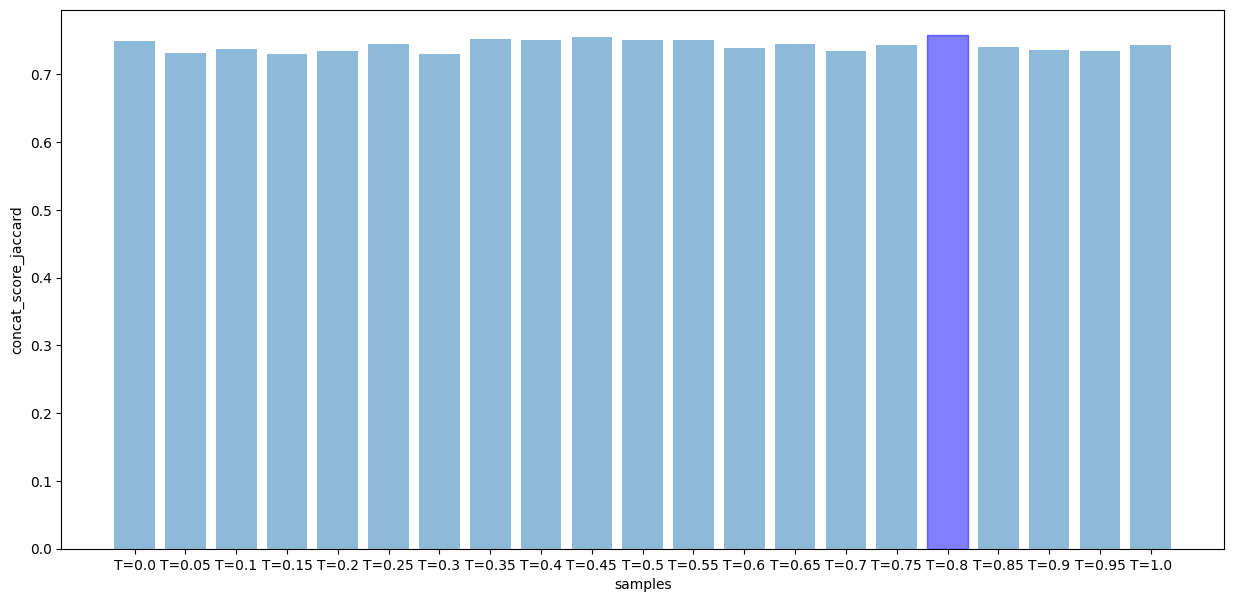

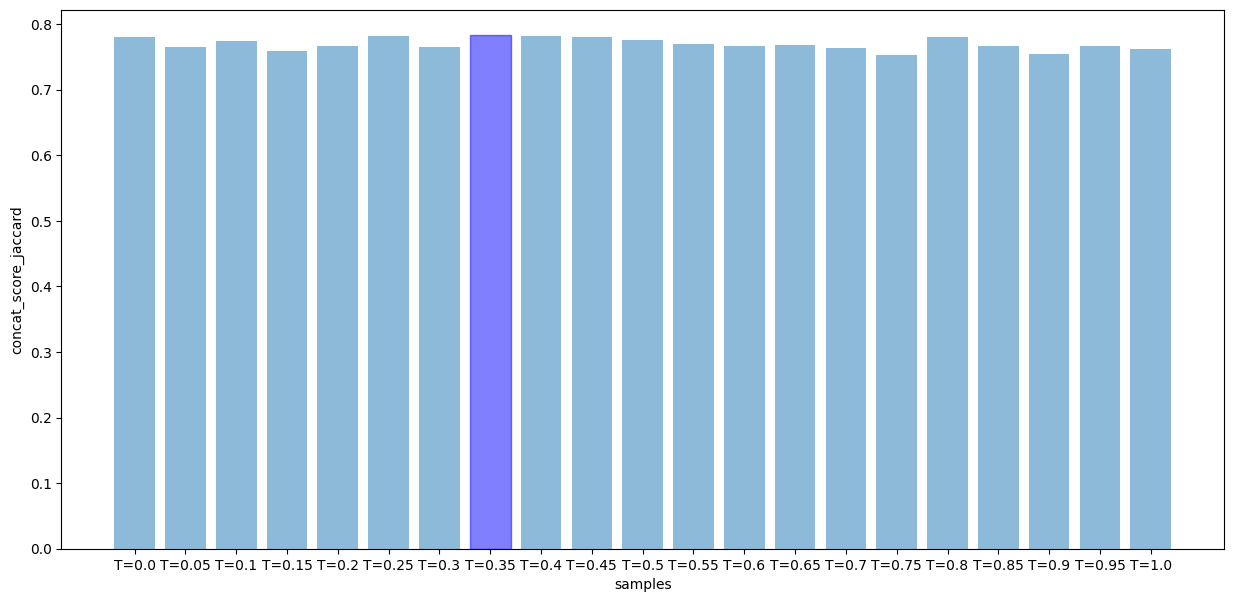

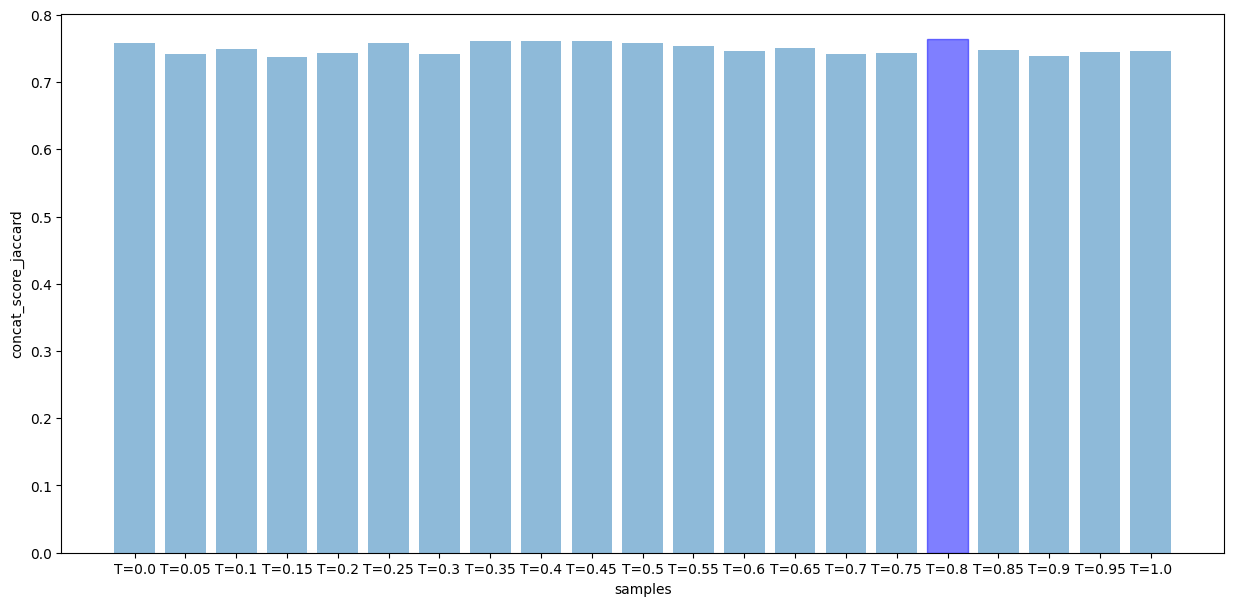

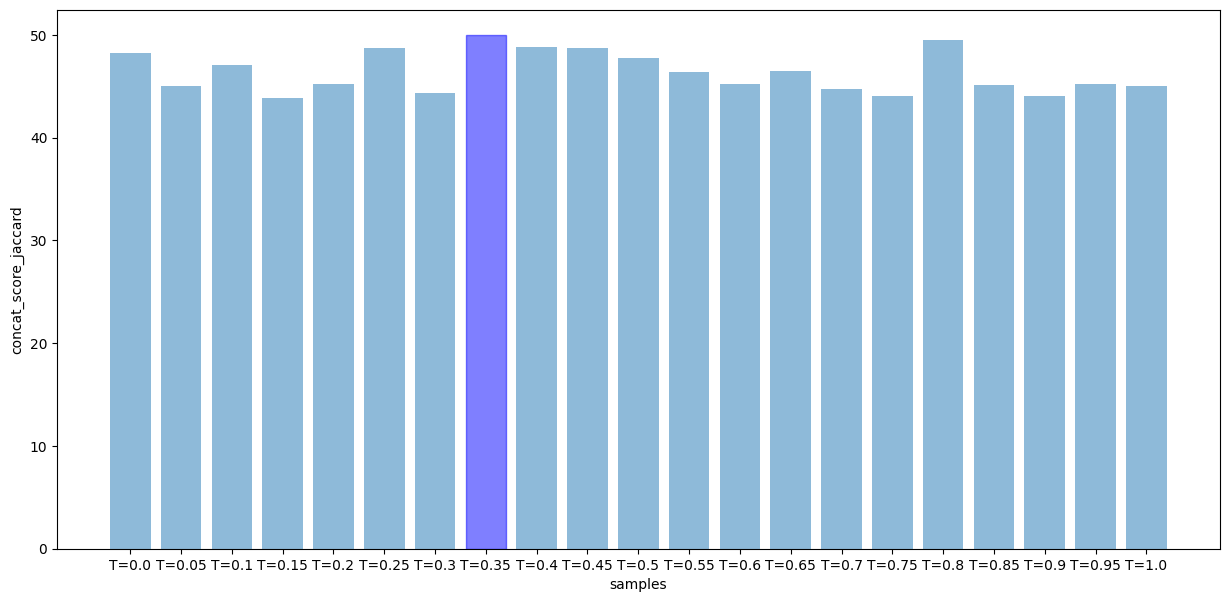

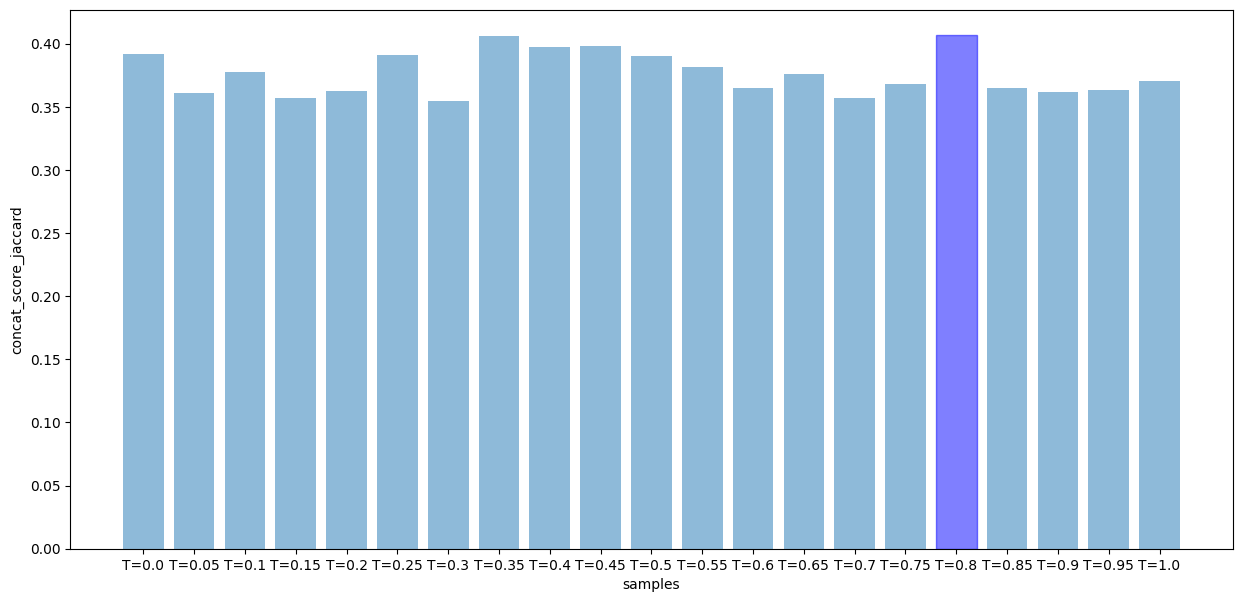

In [25]:
means = [[] for _ in range(len(markups))]

for col in markups[0].columns[-5:]:
    for markup_num in range(len(means)):
        means[markup_num].append(markups[markup_num][col].mean())

means = np.array(means)

for i, metric in enumerate(markups[0].columns[-5:]):
    plt.figure(figsize=(15, 7))
    ax = plt.bar(x=markup_names, height=means[:, i], alpha=0.5)
    ax.patches[means[:, i].argmax()].set_color('blue')
    
    plt.xlabel('samples')
    plt.ylabel(col)
    plt.show()

# plt.bar(markup_gpt.columns[-10:], gpt_means, label='YaGPT', alpha=0.5)
# plt.bar(markup_gpt.columns[-10:], gpt_lite_means, label='YaGPT-lite', alpha=0.5)
# plt.bar(markup_gpt.columns[-10:], pd.Series(gpt_means) - pd.Series(gpt_lite_means), label='YaGPT - YaGPT-lite', alpha=0.5)

In [16]:
(markups[0]['answers'] == "{'-'}").sum()

41